In [1]:
import pandas as p
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import nbconvert

In [2]:
# vamos começar trabalhando com as listas separadas por causa do tamanho total: milhões de linhas na tabela (uma para cada entrada na dívida em múltiplos anos) demandam memória demais

arquivos = glob.glob('n_prev/*.csv')
lista = []
for f in arquivos:
  estado = p.read_csv(f, encoding='iso-8859-1', sep=';').filter(items=['DATA_INSCRICAO', 'VALOR_CONSOLIDADO'])  # limitando as colunas para economizar memória
  lista.append(estado)

def agrupaAno(ds):
  ds.columns = ['ano', 'dívida']
  ds['ano'] = ds['ano'].str[-4:]
  ds = ds.groupby('ano').agg('sum')
  return ds

n_prev = agrupaAno(p.concat(lista))

del lista

In [3]:
arquivos = glob.glob('prev/*.csv')
lista = []
for f in arquivos:
  estado = p.read_csv(f, encoding='iso-8859-1', sep=';').filter(items=['DATA_INSCRICAO', 'VALOR_CONSOLIDADO'])
  lista.append(estado)

prev = agrupaAno(p.concat(lista))

del lista

In [4]:
# os arquivos tratando de FGTS incluem um arquivo "NA" (= nacional) que possui entradas repetidas... então aqui precisamos de um arquivo específico

fgts = p.read_csv('fgts_total.csv', na_filter=False).filter(items=['DATA_INSCRICAO', 'VALOR_CONSOLIDADO'])
fgts = agrupaAno(fgts)

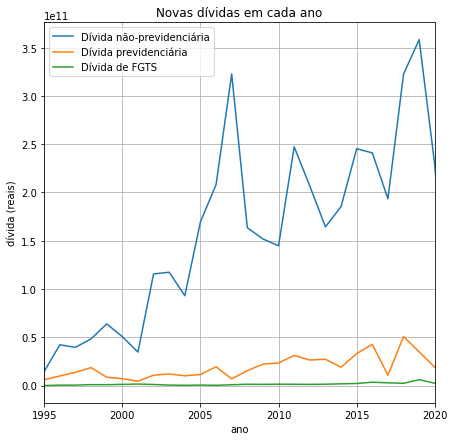

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title("Novas dívidas em cada ano")
ax.plot(n_prev.index.astype(int), n_prev['dívida'], label ="Dívida não-previdenciária")
ax.plot(prev.index.astype(int), prev['dívida'], label ="Dívida previdenciária")
ax.plot(fgts.index.astype(int), fgts['dívida'], label ="Dívida de FGTS")
ax.set_xlim(1995,2020)
ax.set_xlabel("ano")
ax.set_ylabel("dívida (reais)")
ax.grid()
ax.legend()